## Генерация выборки из заданного распределения

Допустим, у нас есть генератор случайных числе из отрезка [0, 1]. Как получить выборку из нового распределения $F$?



### Задача
Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса. Сравните время генерации выборки с неупорядоченными и упорядоченными весами.


0.002465963363647461 seconds


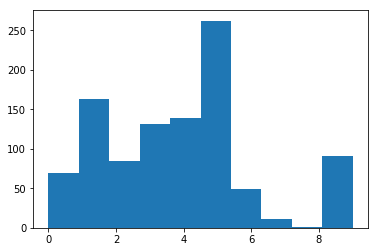

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import time

weights = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
ind0 = np.argsort(weights)
ind = ind0[::-1]
weights = weights[ind]
weights = weights / weights.sum()
random = np.random.rand(1000)
weights = np.cumsum(weights)
start = time.time()
for k in range(1000):
    for i in range(10):
        if random[k] < weights[i]:
            random[k] = ind[i]
            break
end = time.time()
print(end - start, "seconds")
plt.hist(random)
plt.show()

0.011925935745239258 seconds


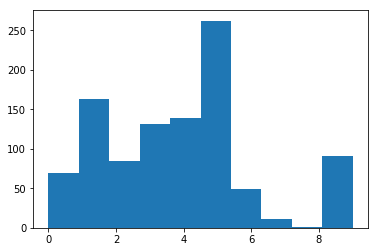

In [35]:
weights = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2]) #-> ind0 сорт. -> ind перевернутый

ind = np.arange(10)
weights = weights / weights.sum()
weights = np.cumsum(weights)
start = time.time()
for k in range(1000):
    for i in range(10):
        if random[k] < weights[i]:
            random[k] = ind[i]
            break
end = time.time()
print(end - start, "seconds")
plt.hist(random)
plt.show()

### Inverse transform method

В следующем предложении заключается идея метода *inverse transform*:

Если $\xi$ имеет равномерное распределение в $[0,1]$, тогда $F^{-1}(\xi)$ распределена по закону $F$. (Для каких $F$ это верно?)

Для строго возрастающих

### Задача
Смделируйте выборку размера 1000 из распределения $Exp(\lambda)$. Постройте выборочную гистограмму и точный график плотности распределения.

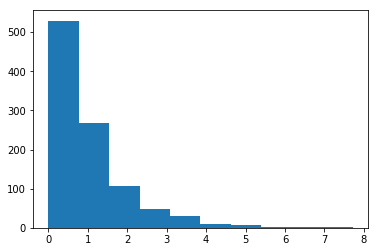

In [18]:
import numpy
import math

lamb = 1
n = 1000

u = np.random.uniform(0, 1, n)
x = [-1 / lamb * math.log(1 - u[i]) for i in range(1000)]

plt.hist(x)
plt.show()

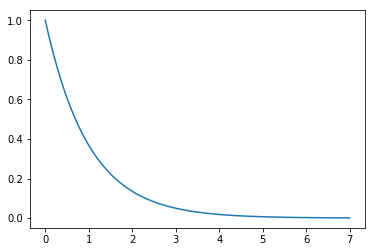

In [37]:
fig = plt.figure()
ax = plt.axes()

t = np.linspace(0, 7, 1000)
ax.plot(t, np.exp(- lamb * t))
plt.show()

### Rejection sampling (Accept-reject method)

Идея метода: сэмплить из распределения, из которого умеем, а затем отбирать точки, которые следуют нужному распределению. Картинка иллюстрирует идею метода:
<img src=https://colcarroll.github.io/hamiltonian_monte_carlo_talk/images/bayes_talk.015.png style="width: 50%;"/>
 

### Задача
Обоснуйте, что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из усеченного распределения Коши, приведенного ниже, используя генератор равномерного распределения. Нарисуйте график полученной выборочной гистограммы и сравните его с графиком точной функции плотности.

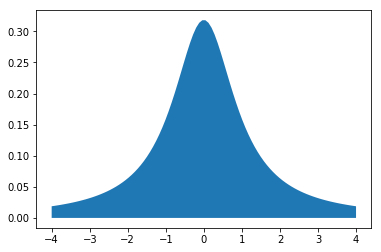

In [23]:
from scipy import stats
import numpy as np
dist = stats.cauchy()
x = np.linspace(-4, 4, 100)
plt.fill_between(x, 0, dist.pdf(x)) #needs to be normalized!
plt.show()

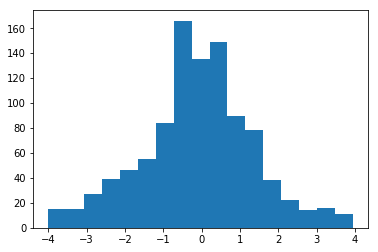

In [57]:
N = 1000

a = np.random.uniform(-4, 4, N)
a.sort()
cauchy_points = list()

max = dist.pdf(0)
j = 0
for i in range(N):
    j = 0
    while (j == 0):
        s = np.random.uniform(0, max)
        if s < dist.pdf(a[i]):
            
            cauchy_points.append(s)
            j = 1
    
u = np.array(cauchy_points)
u = u/np.sum(u)

y = np.random.choice(a, size = N, p = u)
plt.hist(y, bins = 17)
plt.show()

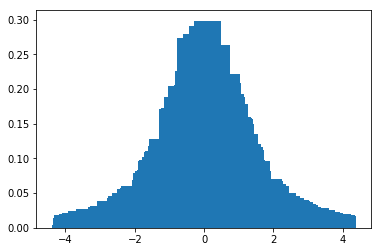

In [25]:
plt.bar(a, cauchy_points)
plt.show()

##  Coordinate transformation method

Метод аccept-reject в ряде случаев может оказываться неэффективным и требовать слишком много пробных точек. Альтернатива -  попробовать найти преобразование координат, которое переводит простую область (из которой легко сэмплить, например, едининчный квадрат) в требуемую, но при этом сохраняет соотношение площадей.

### Задача
Смоделировать выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора. 

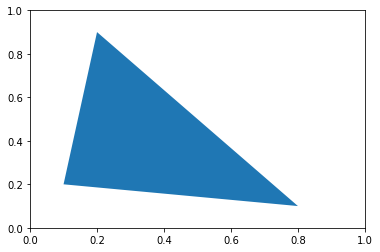

In [40]:
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.show()

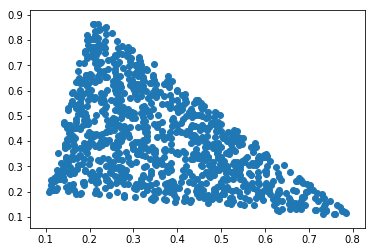

In [44]:
import math
import random
import matplotlib.pyplot as plt

def triangle(A, B, C):
    a = random.random()
    b = random.random()
    a = math.sqrt(a)
    x = A[0] * (1 - a) + B[0] * (1 - b) * a + C[0] * b * a
    y = A[1] * (1 - a) + B[1] * (1 - b) * a + C[1] * b * a
    return np.array([x, y])

pts_triangle = [triangle((0.1, 0.2), (0.2, 0.9), (0.8, 0.1)) for i in range(1000)]

pts_triangle = np.array([pts_triangle])
pts_triangle = np.transpose(pts_triangle)
plt.scatter(pts_triangle[0], pts_triangle[1])
plt.show()

### Задача
Смоделировать выборку из 500 точек внутри данного круга без использования метода отбора.

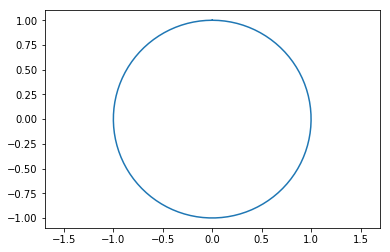

In [45]:
from matplotlib.patches import Circle
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

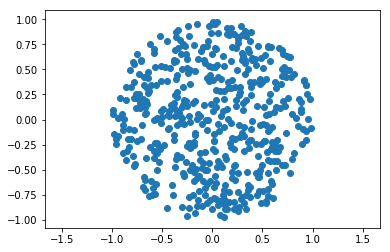

In [50]:
def circle(t, s):
    x = s * np.cos(t)
    y = s * np.sin(t)
    return np.array([x, y])

a = np.random.rand(500)
b = np.sqrt(np.random.rand(500))
pts_circle = circle(2 * np.pi * a, b)
plt.scatter(pts_circle[0], pts_circle[1])
plt.axis('equal')
plt.show()

### Задача
Напишите функцию, которая моделирует случайное симметричное блуждание на двумерной решетке длины n c началом и концом в точке (0, 0). Приведите графики выборочных траекторий для n=100.

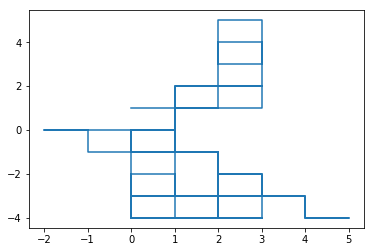

In [51]:
import numpy as np
import matplotlib.pyplot as plt

N = 100
x_ = np.ones(N)
y_ = np.ones(N)

ind = np.arange(N)

indx = np.random.choice(ind, N // 2, replace = False)
indy = np.random.choice(ind, N // 2, replace = False)

x_[indx] = -1
y_[indy] = -1

x_ = np.cumsum(x_)
y_ = np.cumsum(y_)

x =(x_ + y_) / 2
y = (y_ - x_)/2

plt.plot(x,y)
plt.show()

## Random normal generator

### Задача
Докажите, что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из независимых N(0,1) случаных величин. Модифицируйте метод, чтобы исключить вызовы тригонометрических функций ```np.sin``` и ```np.cos```. С помощью модивицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского распределения со средним (3, 6) и ковариационной матрицей ((2, 1), (1, 4)). Постройте 2D гистограмму полученного распределения.

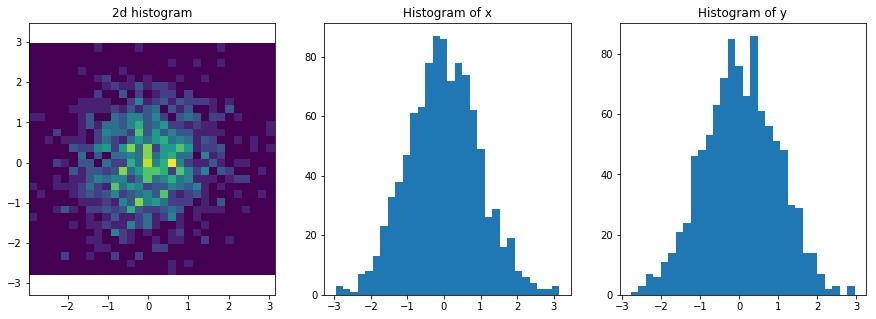

In [52]:
n = 1000
u = np.zeros(n)
v = np.zeros(n)
for i in range(n):
    w = 0
    while w == 0:
        u1 = 2 * (np.random.rand() - 0.5)
        u2 = 2 * (np.random.rand() - 0.5)
        check_r = u1 ** 2 + u2 ** 2
        if check_r < 1:
            u[i] = u1
            v[i] = u2
            w = 1
    
r = u ** 2 + v ** 2

x = u * np.sqrt((-2) * np.log(r) / r)
y = v * np.sqrt((-2) * np.log(r) / r)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

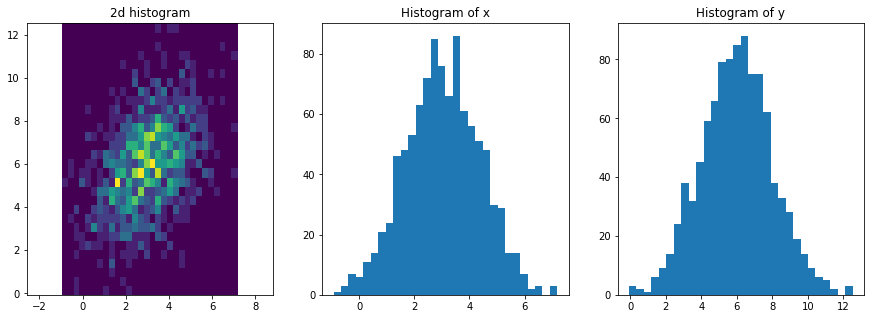

In [53]:
# Solution here


x_ = 3 + np.sqrt(2) * y
y_ = 6 +  x * np.sqrt(7/2) + np.sqrt(1/2) * y
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x_, y_, bins=30)
ax[0].axis('equal')
ax[1].hist(x_, bins=30)
ax[2].hist(y_, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

## Практическое задание

Реализовать метод генерации случайного разбиения n-элементного множества на подмножества. С его помощью оценить ожидаемое число подмножеств в случайном разбиении множества из 100 элементов. 

Подсказка 1: Ширяев, Вероятность, т1, задача 2 к параграфу 1.

Подсказка 2: http://djalil.chafai.net/blog/2012/05/03/generating-uniform-random-partitions/

In [54]:
attempts = 1000
n = 100

def subsets(n):
    i = 0
    subset = []
    tmp = np.array([i ** n / np.math.factorial(i) for i in range(1, n + 1)])
    Bell = tmp.sum() / np.exp(1)
    p = tmp / Bell / np.exp(1)
    pcum = p.cumsum()
    d = np.random.rand()
    i = 0
    for x in pcum:
        if d < x:
            m = i + 1
            break
        else:
            i = i + 1       
    p = np.ones(m) / m
    pcum = p.cumsum()
    a = np.random.rand(n) 
    
    for t in a:
        i = 0
        u = 0
        while u != -1:
            if t < pcum[i]:
                subset.append(i)
                u = -1
            else:
                i = i + 1
    return subset


E = [len(np.unique(subsets(n))) / attempts for i in range(attempts)]
print(sum(E))

28.617999999999927
